## **Importing libraries**

In [25]:
import kagglehub
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import seaborn as sns



## **Downloading the dataset**

In [ ]:
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("yasserh/customer-segmentation-dataset")
print("Path to dataset files:", path)


100%|██████████| 21.8M/21.8M [00:00<00:00, 66.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/customer-segmentation-dataset/versions/1


## **Load the dataset**

In [ ]:
import os

# List files in the downloaded directory
print(os.listdir(path))


['Online Retail.xlsx']


In [12]:
# Correct path to the dataset
dataset_path = f'{path}/Online Retail.xlsx'

# Load the dataset into a Pandas DataFrame
dataset = pd.read_excel(dataset_path)

# Inspect the dataset
dataset.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## **Data Preprocessing**

In [15]:
# Select only numeric columns for clustering
dataset = dataset.select_dtypes(include=[np.number])

# Display the cleaned data
print(dataset.head())


   Quantity  UnitPrice  CustomerID
0         6       2.55     17850.0
1         6       3.39     17850.0
2         8       2.75     17850.0
3         6       3.39     17850.0
4         6       3.39     17850.0


In [16]:
# Fill missing values with the mean of each column
dataset.fillna(dataset.mean(), inplace=True)


In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardize the data
scaled_data = scaler.fit_transform(dataset)


## **Apply Kmeans Clustering**

In [18]:
from sklearn.cluster import KMeans

# Apply K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model on the scaled data
kmeans.fit(scaled_data)

# Add the cluster labels to the dataset
dataset['Cluster'] = kmeans.labels_

# Display the dataset with cluster labels
print(dataset.head())


   Quantity  UnitPrice  CustomerID  Cluster
0         6       2.55     17850.0        3
1         6       3.39     17850.0        3
2         8       2.75     17850.0        3
3         6       3.39     17850.0        3
4         6       3.39     17850.0        3


## **Apply PCA for Dimensionality Reduction**

In [19]:
from sklearn.decomposition import PCA

# Initialize PCA and reduce to 2 components
pca = PCA(n_components=2)

# Apply PCA to the scaled data
pca_result = pca.fit_transform(scaled_data)

# Add the PCA components to the dataset for visualization
dataset['PCA1'] = pca_result[:, 0]
dataset['PCA2'] = pca_result[:, 1]

# Display the dataset with PCA components
print(dataset.head())


   Quantity  UnitPrice  CustomerID  Cluster      PCA1      PCA2
0         6       2.55     17850.0        3  1.310127 -0.129040
1         6       3.39     17850.0        3  1.307010 -0.122164
2         8       2.75     17850.0        3  1.304283 -0.132964
3         6       3.39     17850.0        3  1.307010 -0.122164
4         6       3.39     17850.0        3  1.307010 -0.122164


## **Visualize the Clusters in 2D**

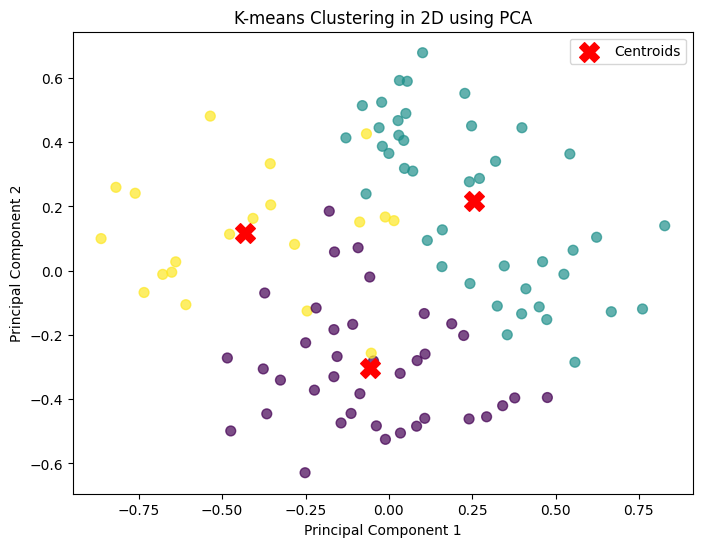

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Example dataset with 5 features (you can replace this with your own data)
np.random.seed(42)
X = np.random.rand(100, 5)

# K-means clustering
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Plotting the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)

# Adding the centroids
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200, label='Centroids')

# Titles and labels
plt.title('K-means Clustering in 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Show plot
plt.show()


## **Evaluate the clustering**

In [21]:
# Display the centroids of the clusters in the original feature space
print("Cluster Centroids (in original feature space):")
print(scaler.inverse_transform(kmeans.cluster_centers_))


Cluster Centroids (in original feature space):
[[ 8.66146912e+00  4.58035733e+00  1.45148681e+04]
 [-8.06451613e-01  9.73043645e+03  1.53533111e+04]
 [-7.76050000e+04  1.56000000e+00  1.43960000e+04]
 [ 1.16183996e+01  2.83685307e+00  1.70783403e+04]
 [ 7.76050000e+04  1.56000000e+00  1.43960000e+04]]
